In [1]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from regNN import RegressionNN  
import numpy as np
from numpy import genfromtxt
import logging
from sklearn.preprocessing import StandardScaler, RobustScaler


# Example data placeholders 
X = genfromtxt('data/X.csv', delimiter=',').astype(np.float32) # Load input features
y = genfromtxt('data/y.csv', delimiter=',').astype(np.float32)  # Load target values

# Z-score normalization (StandardScaler)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
from scipy.stats.mstats import winsorize


X = np.log1p(X+1)
y = np.log1p(y+1)
# X = winsorize(X, limits=[0.001, 0.001], axis=0)
# X[:,[1,3]] = np.log(X[:,[1,3]]+1)  # Apply log transformation to specific columns
X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

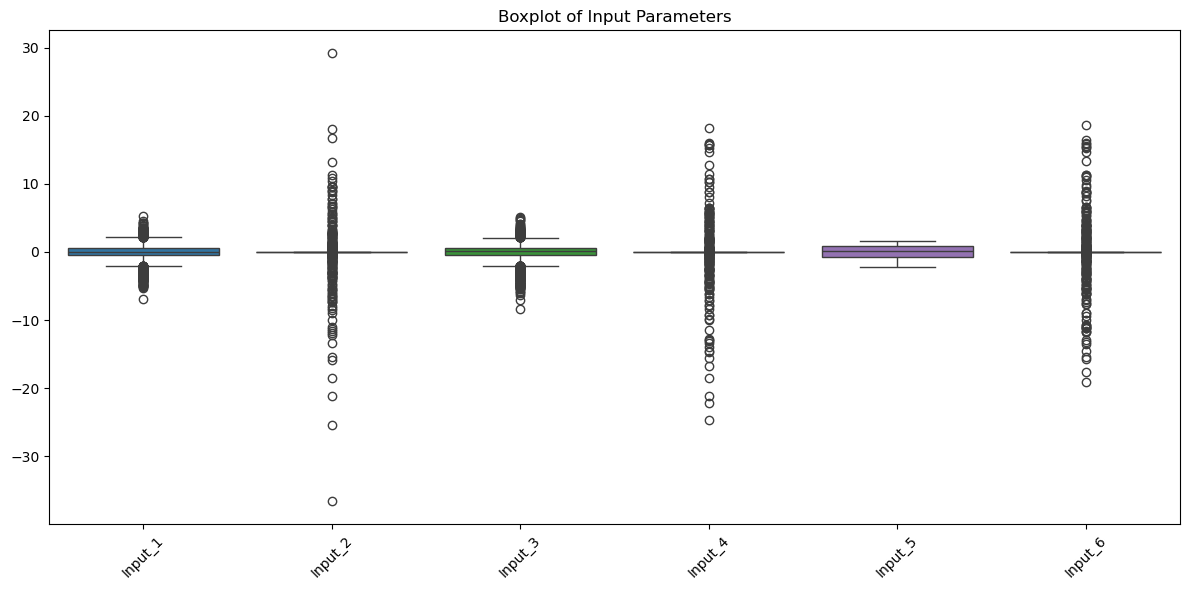

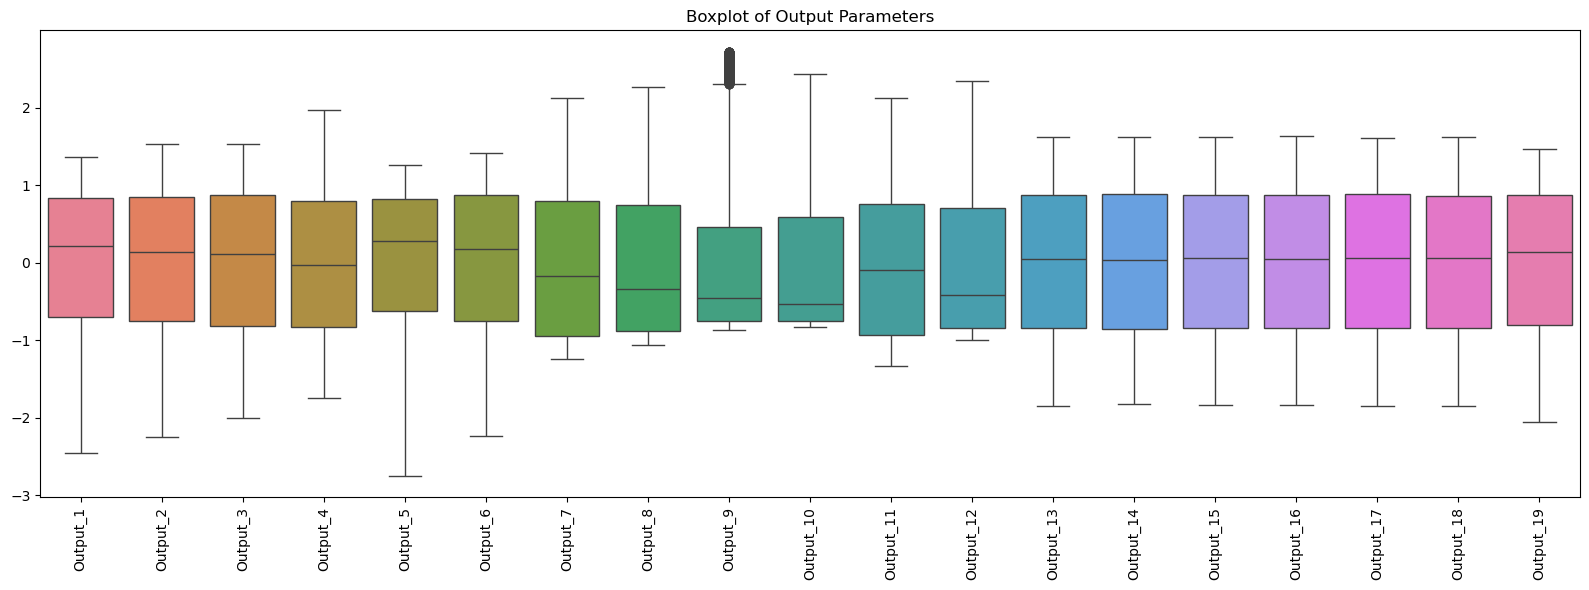

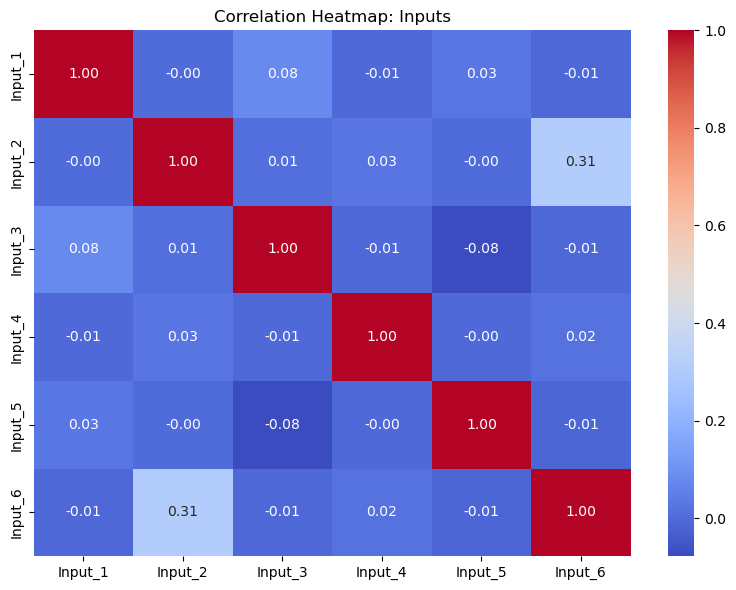

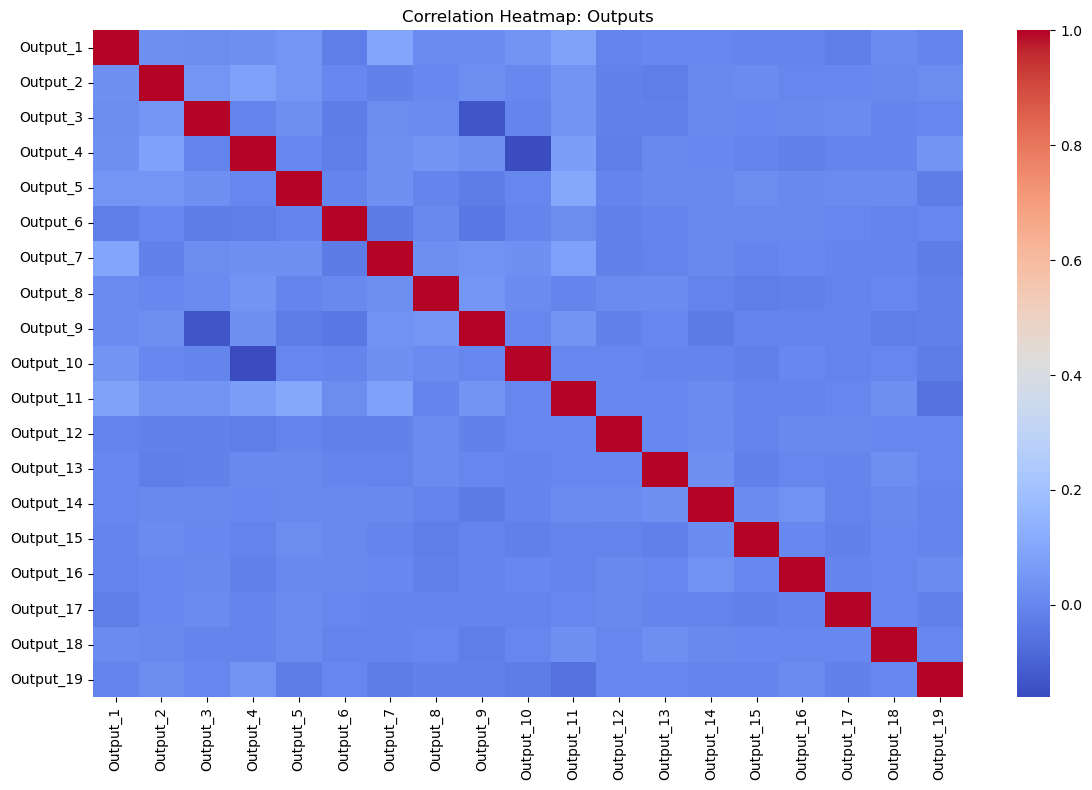

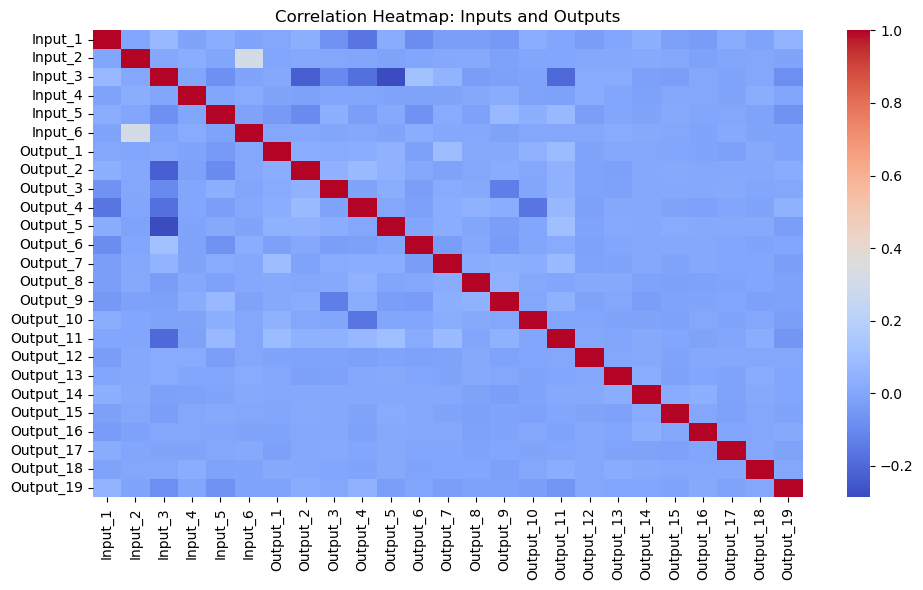

          count          mean       std        min       25%       50%  \
Input_1  9055.0 -7.688373e-09  1.000055  -6.944146 -0.501297  0.051734   
Input_2  9055.0  5.476650e-09  1.000030 -36.632996  0.007669  0.007669   
Input_3  9055.0 -8.530935e-09  1.000054  -8.343128 -0.466869  0.090431   
Input_4  9055.0 -5.687290e-09  1.000048 -24.734632  0.003842  0.003842   
Input_5  9055.0 -9.689457e-09  1.000054  -2.259875 -0.717505  0.122924   
Input_6  9055.0  3.580886e-09  1.000055 -19.147799 -0.000477 -0.000477   

              75%        max  
Input_1  0.567017   5.293757  
Input_2  0.007669  29.261314  
Input_3  0.569790   5.142168  
Input_4  0.003842  18.262327  
Input_5  0.842715   1.542929  
Input_6 -0.000477  18.605438  
            count          mean       std       min       25%       50%  \
Output_1   9055.0 -8.425615e-10  1.000054 -2.458722 -0.693518  0.219176   
Output_2   9055.0 -2.085340e-08  1.000054 -2.251486 -0.751109  0.133299   
Output_3   9055.0  1.874699e-08  1.0000

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create dataframes for easier visualization
df_X = pd.DataFrame(X, columns=[f'Input_{i+1}' for i in range(X.shape[1])])
df_y = pd.DataFrame(y, columns=[f'Output_{i+1}' for i in range(y.shape[1])])

# Concatenate for a combined view if needed
df_all = pd.concat([df_X, df_y], axis=1)

# Compute descriptive statistics
input_stats = df_X.describe().T
output_stats = df_y.describe().T

# Visualize using box plots and heatmaps
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_X)
plt.title("Boxplot of Input Parameters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
sns.boxplot(data=df_y)
plt.title("Boxplot of Output Parameters")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correlation heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(df_X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Inputs")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df_y.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap: Outputs")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_all.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap: Inputs and Outputs")
plt.tight_layout()
plt.show()

print(input_stats)
print(output_stats)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
res_dic = {}
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RF": RandomForestRegressor(),
    "GB": GradientBoostingRegressor()
}
for name, model in models.items():
    
    print(f"======={name} model  =======")
    res_dic[name] = {}
    for i in range(y_train.shape[1]):
        
        # Reshape y_train to be 2D for each output
        y_train_i = y_train[:, [i]]
        y_val_i = y_val[:, [i]].ravel()
        
        # Fit the model
        model.fit(X_train, y_train_i)
        model.fit(X_train, y_train_i)
        
        # Evaluate the model
        score = model.score(X_val, y_val_i)
        res_dic[name][f'Output_{i+1}'] = score

pd.DataFrame(res_dic)

,Linear,Ridge,Lasso,RF,GB
Output_1,-0.002486,-0.002486,-0.002174,-0.093177,0.012834
Output_2,0.081883,0.081880,0.043900,0.027075,0.135797
Output_3,0.014727,0.014727,0.000415,-0.086388,0.012566
Output_4,0.055260,0.055260,0.034861,-0.023084,0.072906
Output_5,0.096345,0.096342,0.080927,0.087873,0.159345
Output_6,0.027676,0.027675,0.002622,-0.050045,0.044290
Output_7,0.004923,0.004923,-0.000196,-0.093392,-0.005778
Output_8,0.000389,0.000389,-0.000600,-0.107128,-0.009216
Output_9,0.001979,0.001980,-0.000049,-0.071128,0.003372
Output_10,-0.001816,-0.001816,-0.001272,-0.097589,-0.010450


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

y_clusters = [[0,1,2,3,4,5], [6,7,8,9,10,11], [12,13,14,15,16,17],[18],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
for i in y_clusters:
    # Reshape y_train to be 2D for each output
    y_train_i = y_train[:, i]
    y_val_i = y_val[:, i]

    # Fit the model
    X_train_i, X_val_i = X_train, X_val  # Use the same X for all outputs
    rf.fit(X_train_i, y_train_i)

    # Predict and evaluate
    y_pred = rf.predict(X_val_i)
    mse = mean_squared_error(y_val_i, y_pred)
    r2 = r2_score(y_val_i, y_pred)
    print(f"Random Forest - Output {i}: MSE = {mse:.4f}, R² = {r2:.4f}")



Random Forest - Output [0, 1, 2, 3, 4, 5]: MSE = 1.0161, R² = -0.0121
Random Forest - Output [6, 7, 8, 9, 10, 11]: MSE = 1.0767, R² = -0.0732
Random Forest - Output [12, 13, 14, 15, 16, 17]: MSE = 1.0687, R² = -0.0837


/Users/kaiagao/miniconda3/envs/hummingbird/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Output [18]: MSE = 1.0502, R² = -0.0219
Random Forest - Output [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]: MSE = 1.0531, R² = -0.0541
